<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/HW2/CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authors: Federica B. Bianco @fedhere, Christian Munley @chrismun, UDel 


**Overview:** \\
In this notebook, we:
-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. We will do this for a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_, and _Gamma_ distribtuion.                          
-  For distribution we plot the sample mean of each sample (dependent var.) against the sample size N (independent var.)
-  Describe the behavior we see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). as a histogram.
-  FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [34]:
from __future__ import print_function
__author__= 'fbb'
import numpy as np

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mean', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## distributions

In [35]:
distributions = ['normal', 'pois', 'binom', 'chisq', 'gamma']

## *population* mean  


(it will be the same for each distribution)






In [36]:
mymean = 100



![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*


In [37]:
df = mymean

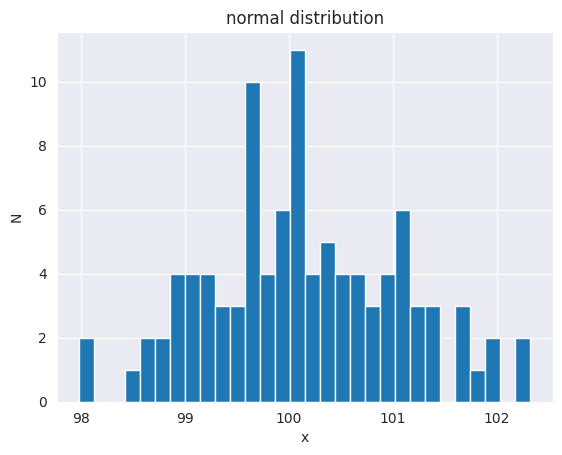

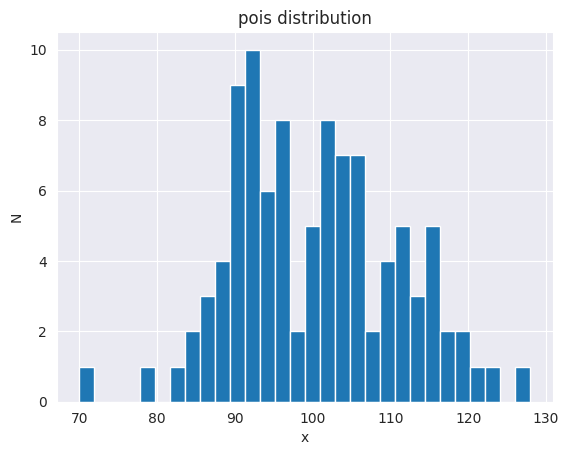

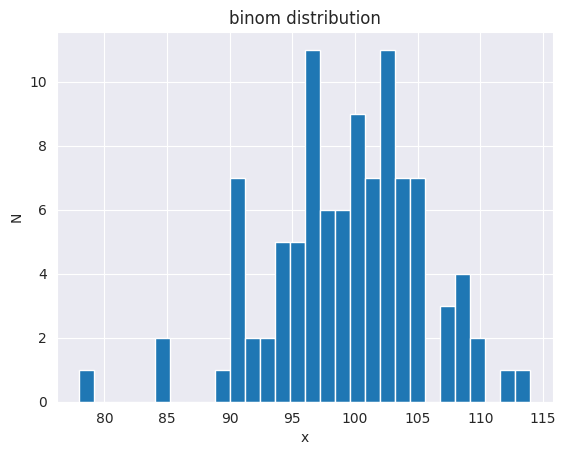

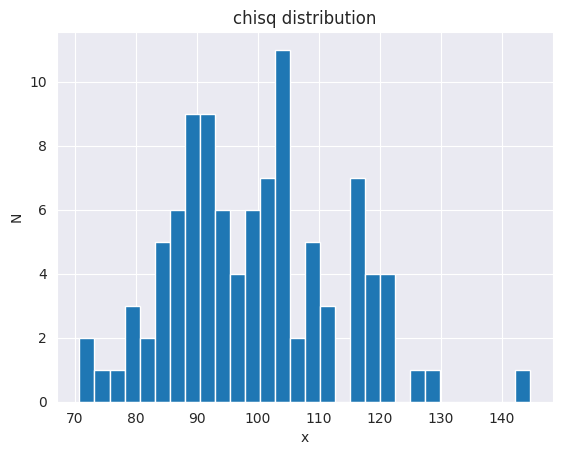

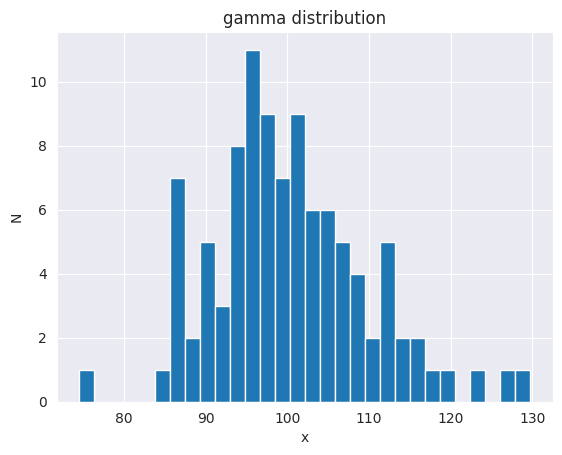

In [38]:
np.random.seed(456)
mymean = 100
mydists = {}

distributions = ['normal', 'pois', 'binom', 'chisq', 'gamma']

for dist in distributions:
    mydists[dist] = {}
    if dist == 'normal':
        mydists[dist][100] = np.random.normal(mymean, size=100)
    elif dist == 'pois':
        mydists[dist][100] = np.random.poisson(mymean, size=100)
    elif dist == 'binom':
        mydists[dist][100] = np.random.binomial(2*mymean, 0.5, size=100)  # n and p are chosen arbitrarily
    elif dist == 'chisq':
        mydists[dist][100] = np.random.chisquare(mymean, size=100)
    elif dist == 'gamma':
        mydists[dist][100] = np.random.gamma(mymean, 1, size=100)  # shape parameter mymean, scale parameter 1

    pl.figure()  # to create a new figure for each distribution
    pl.hist(mydists[dist][100], bins=30)
    pl.title(f'{dist} distribution')
    pl.ylabel('N')
    pl.xlabel('x')
    pl.show()

### Figure 1: Selected distributions of a sample of size 100 with parameters set above

## mean and stdev of all distributions

In [39]:
for dist in distributions:
    mean = mydists[dist][100].mean()
    std = mydists[dist][100].std()
    print(f"{dist.capitalize()} mean: {mean:.2f}, standard deviation: {std:.2f}")


Normal mean: 100.14, standard deviation: 0.92
Pois mean: 100.36, standard deviation: 10.57
Binom mean: 99.30, standard deviation: 6.04
Chisq mean: 99.34, standard deviation: 13.74
Gamma mean: 100.39, standard deviation: 9.60


## Now let's do it for 100 distributions for each
we want distributions of different sizes (all integers between 10 and 2000 - note that generally size > 30 is considered necessary for the theorem to hold). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class).

In [40]:
mysize = (np.logspace(1, 4.3, 100, base=10)).astype(int)
print ("shape of the 'size' list that contains the size of each distribution",
       mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


Text(0, 0.5, 'frequency')

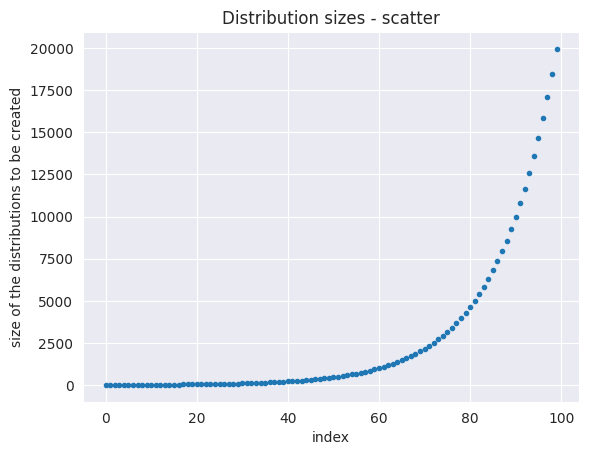

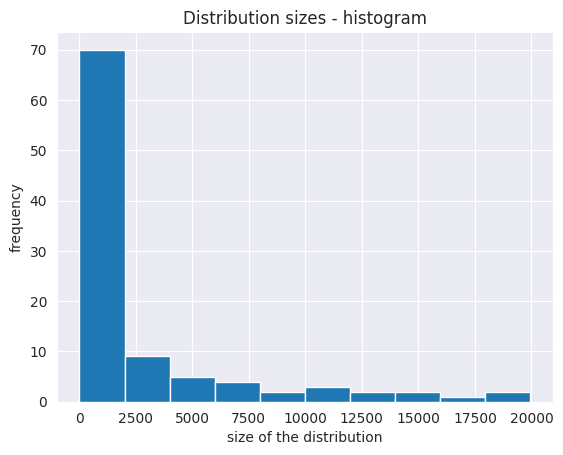

In [41]:
pl.plot(mysize, '.')
pl.title('Distribution sizes - scatter')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.title('Distribution sizes - histogram')
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created



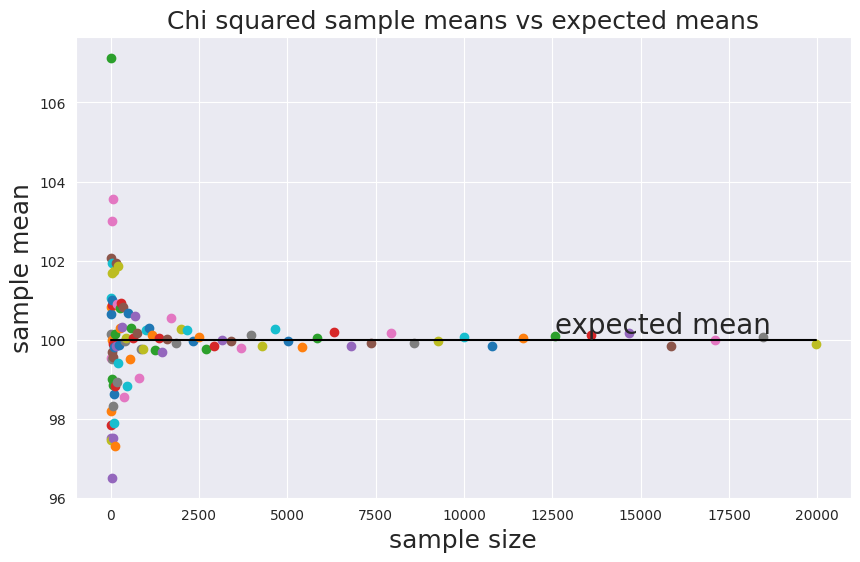

In [42]:
for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

# save the means for plotting later

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared sample means vs sample size', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: This plot shows that the sample means for chi squared follow a gaussian distribution around the expected mean, as N increases.

# the histogram of the mean of all samples:


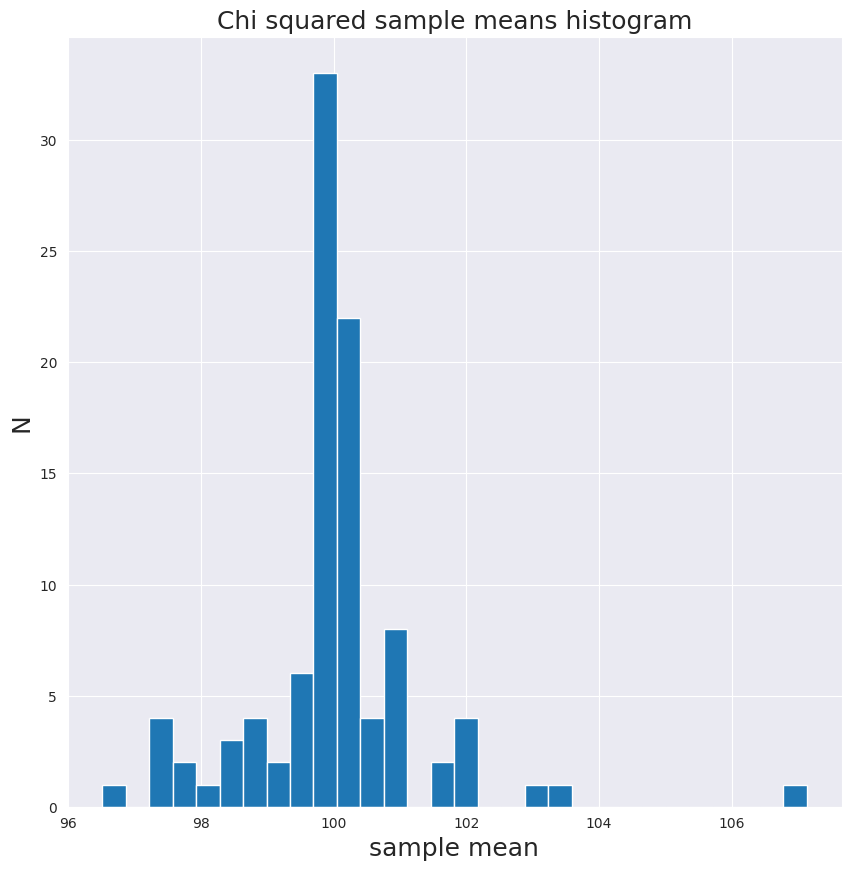

In [43]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.title('Chi squared sample means histogram', fontsize=18)
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

### Figure 3: This plot shows that the sample means follow a gaussian distribution around the expected mean, as N increases, as a histogram

# Normal distribution


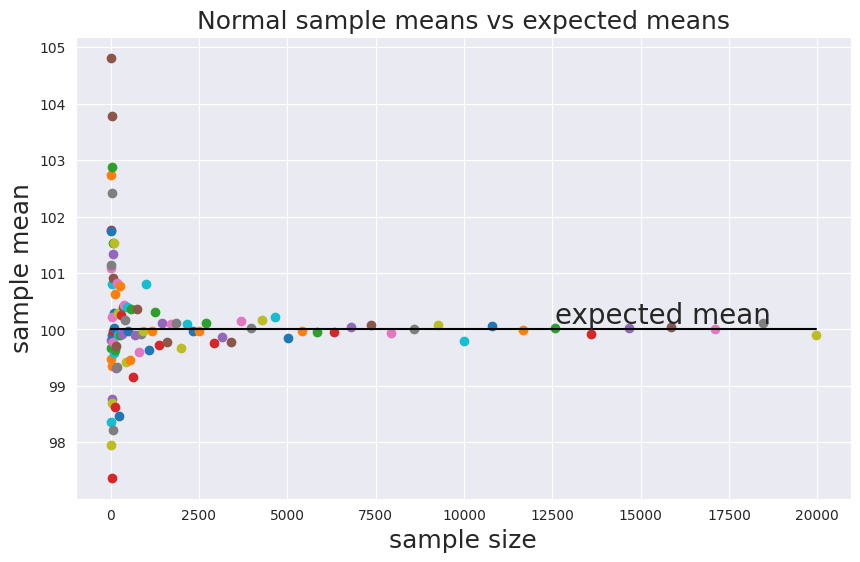

In [44]:
for n in mysize:
    mydists['normal'][n] = np.random.normal(df, np.sqrt(df), size=n)  # mean=df, std=sqrt(df)

mydists['normal']['means'] = {}

axnormal_mu_n = pl.figure(figsize=(10, 6)).add_subplot(111)

for nn in mydists['normal']:
    if not type(nn) == str:  # needed because one element is "mean"
        mydists['normal']['means'][nn] = mydists['normal'][nn].mean()
        # plot
        axnormal_mu_n.plot(nn, mydists['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
axnormal_mu_n.set_title('Normal sample means vs sample size', fontsize=18)
axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axnormal_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, df, "expected mean", va="bottom", fontsize=20)

pl.show()


### Figure 4: This plot shows that the sample means for normal distribution follow a gaussian distribution around the expected mean, as N increases.

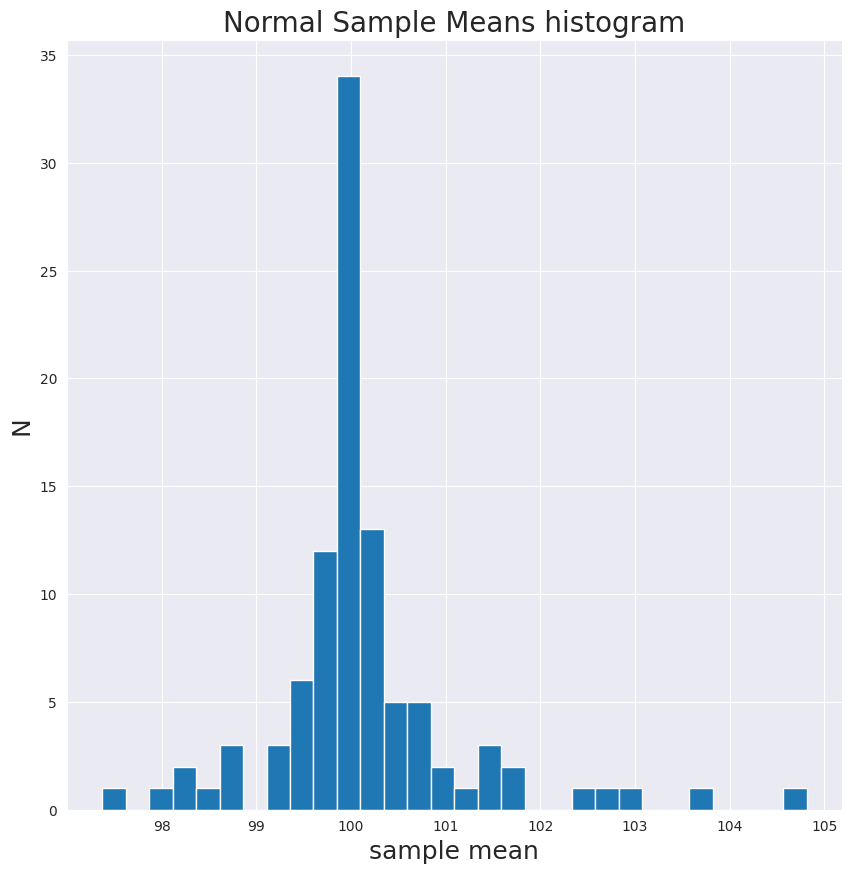

In [45]:
allmeans_normal = list(mydists['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_normal, bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Normal Sample Means histogram', fontsize=20)
pl.show()

### Figure 5: This plot shows that the sample means of normal distribution follow a gaussian distribution around the expected mean, as N increases, as a histogram

# Poisson distribution

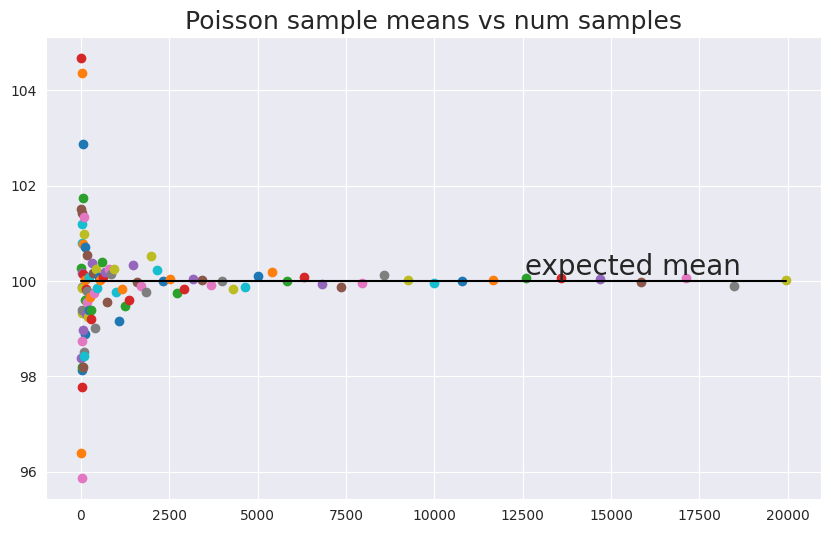

In [57]:
if 'pois' not in mydists:
    mydists['pois'] = {}

for n in mysize:
    mydists['pois'][n] = np.random.poisson(df, size=n)

mydists['pois']['means'] = {}

axpois_mu_n = pl.figure(figsize=(10, 6)).add_subplot(111)

for nn in mydists['pois']:
    if not type(nn) == str:
        mydists['pois']['means'][nn] = mydists['pois'][nn].mean()
        axpois_mu_n.plot(nn, mydists['pois']['means'][nn], 'o')
axpois_mu_n.set_title('Poisson sample means vs num samples', fontsize=18)
axpois_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, df, "expected mean", va="bottom", fontsize=20)
axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


### Figure 6: This plot shows that the sample means of the poission distribution follow a gaussian distribution around the expected mean, as N increases.

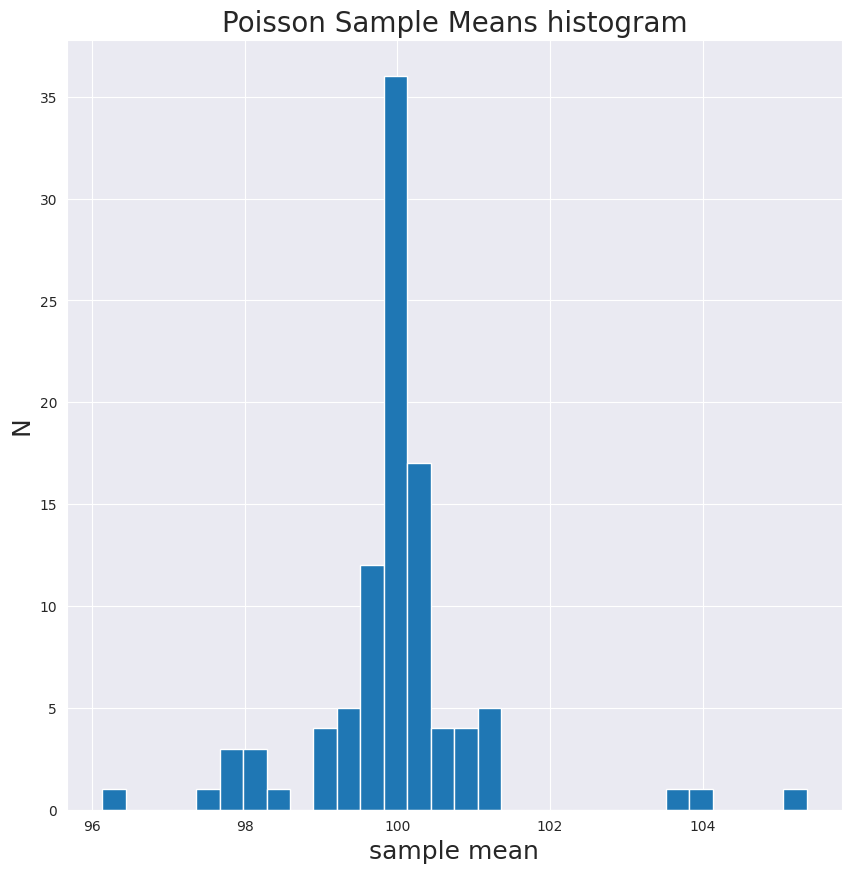

In [47]:
allmeans_pois = list(mydists['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_pois, bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Poisson Sample Means histogram', fontsize=20)
pl.show()

### Figure 7: This plot shows that the sample means follow a gaussian distribution around the expected mean, as N increases. This is the central limit theorem

# Binomial distribution

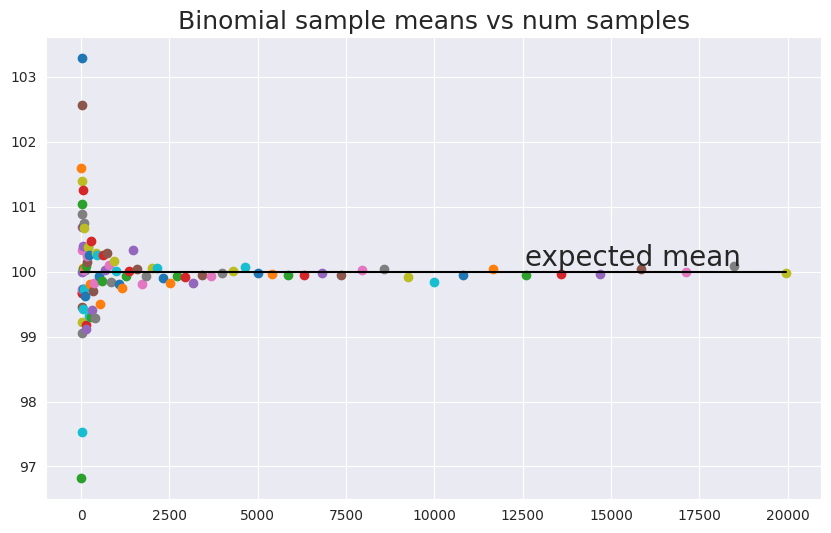

In [58]:
# Binomial distribution
if 'binom' not in mydists:
    mydists['binom'] = {}

for n in mysize:
    mydists['binom'][n] = np.random.binomial(2*df, 0.5, size=n)

# Save the means for plotting later
mydists['binom']['means'] = {}

axbinom_mu_n = pl.figure(figsize=(10, 6)).add_subplot(111)

for nn in mydists['binom']:
    if not type(nn) == str:
        mydists['binom']['means'][nn] = mydists['binom'][nn].mean()
        axbinom_mu_n.plot(nn, mydists['binom']['means'][nn], 'o')
axbinom_mu_n.set_title('Binomial sample means vs num samples', fontsize=18)
axbinom_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, df, "expected mean", va="bottom", fontsize=20)

axbinom_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


### Figure 8: This plot shows that the sample means of a binomial distribution follow a gaussian distribution around the expected mean, as N increases.

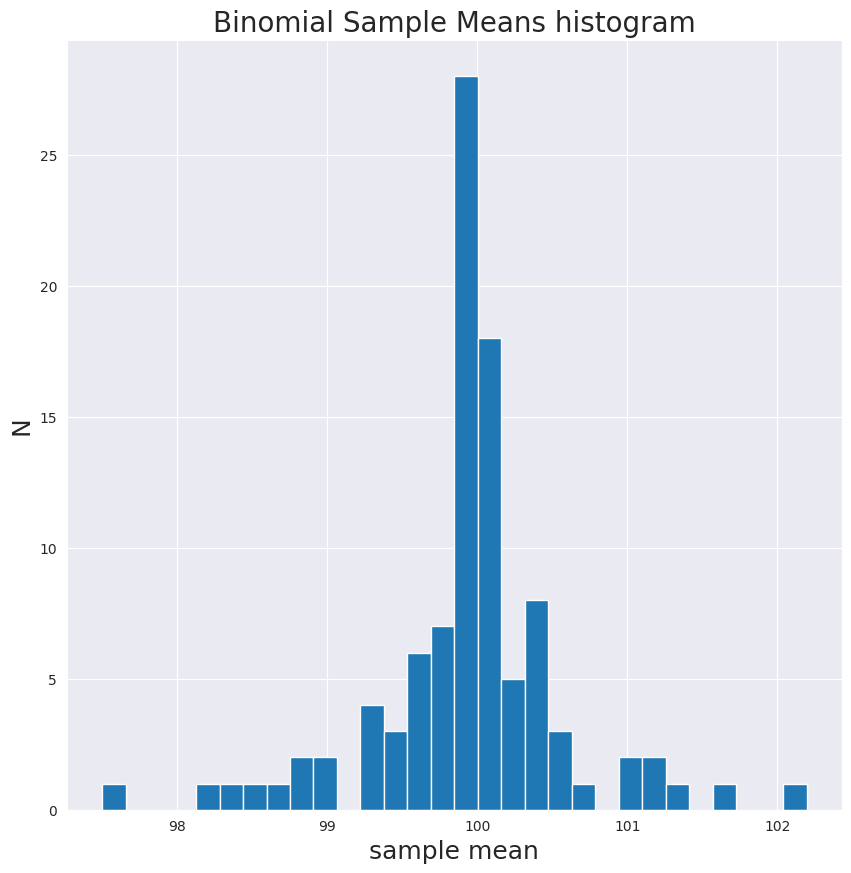

In [49]:
allmeans_binom = list(mydists['binom']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_binom, bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Binomial Sample Means histogram', fontsize=20)
pl.show()


### Figure 9: This plot shows that the sample means of a binomial distribution follow a gaussian distribution around the expected mean, as N increases, as a histogram

# Gamma



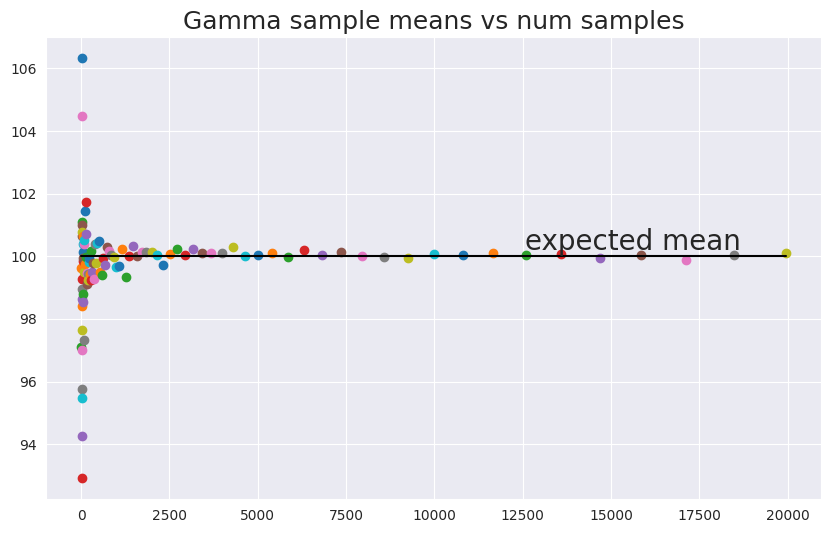

In [59]:
# Gamma distribution
if 'gamma' not in mydists:
    mydists['gamma'] = {}

for n in mysize:
    mydists['gamma'][n] = np.random.gamma(df, 1, size=n)

# Save the means for plotting later
mydists['gamma']['means'] = {}

axgamma_mu_n = pl.figure(figsize=(10, 6)).add_subplot(111)

for nn in mydists['gamma']:
    if not type(nn) == str:
        mydists['gamma']['means'][nn] = mydists['gamma'][nn].mean()
        axgamma_mu_n.plot(nn, mydists['gamma']['means'][nn], 'o')
axgamma_mu_n.set_title('Gamma sample means vs num samples', fontsize=18)
axgamma_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, df, "expected mean", va="bottom", fontsize=20)

axgamma_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


### Figure 10: This plot shows that the sample means for gamma follow a gaussian distribution around the expected mean, as N increases.

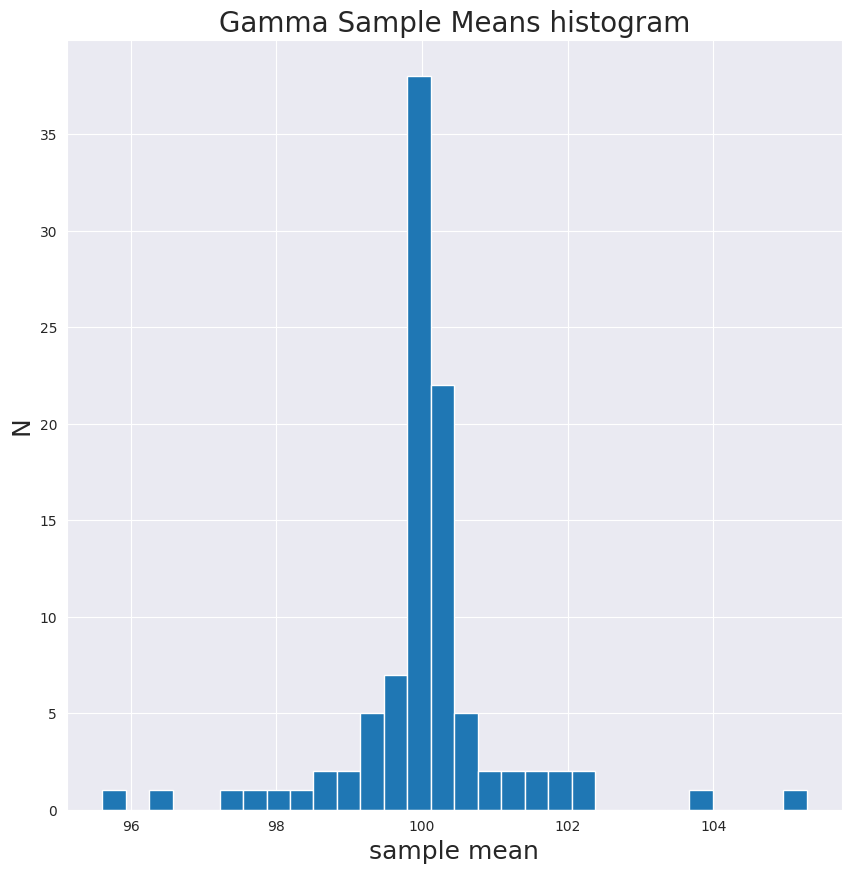

In [51]:
allmeans_gamma = list(mydists['gamma']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_gamma, bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)
pl.title('Gamma Sample Means histogram', fontsize=20)
pl.show()

### Figure 1: This plot shows that the sample means of gamma follow a gaussian distribution around the expected mean, as N increases, as a histogram

# fit  a Gaussian to the histogram of the means for each distribution


In [53]:
def gaussian(x, mu, sigma, amplitude):
    g = amplitude / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return g

def fun(args, x, hb):
    mu, sigma, amplitude = args
    g = gaussian(x, mu, sigma, amplitude)
    return np.sum((g - hb)**2)  # sum of squared residuals

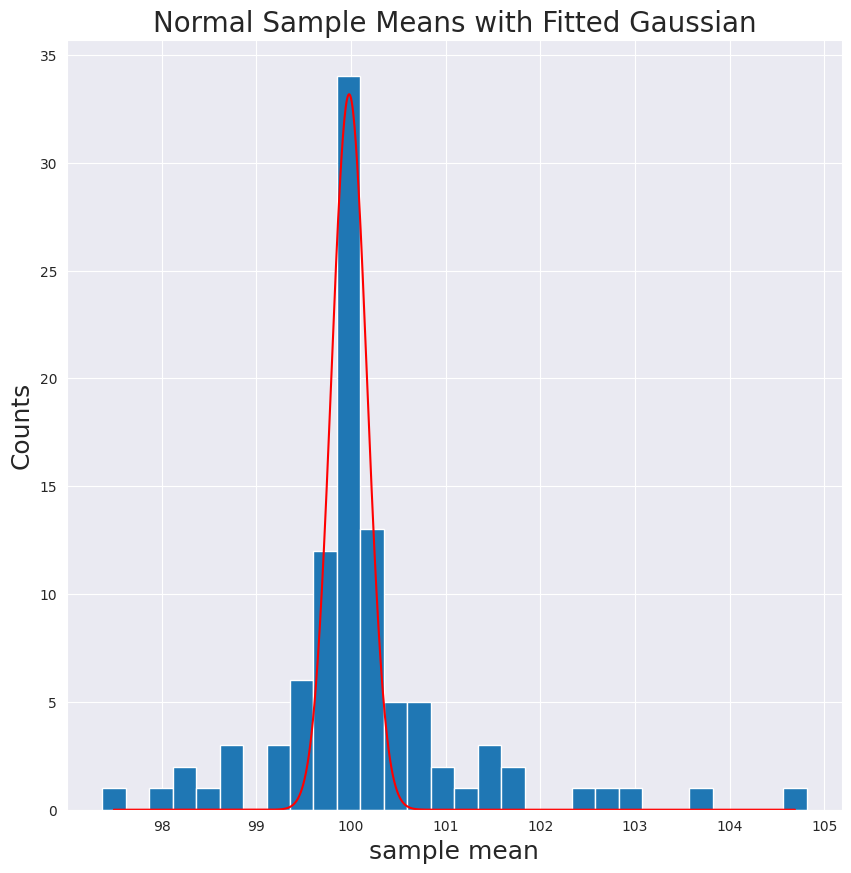

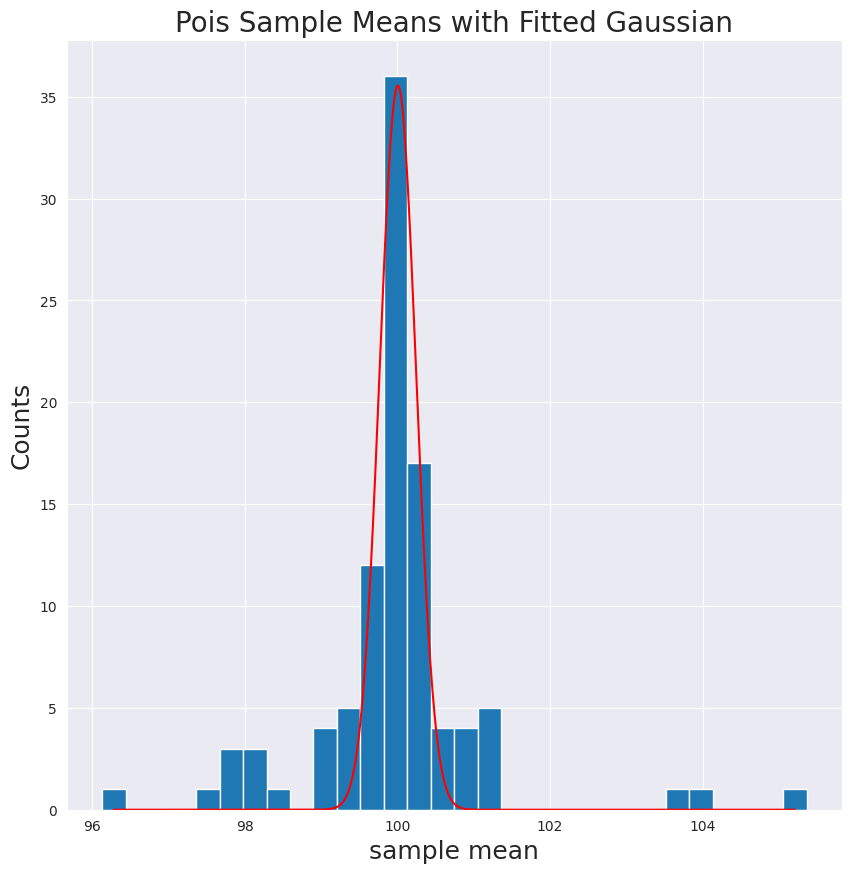

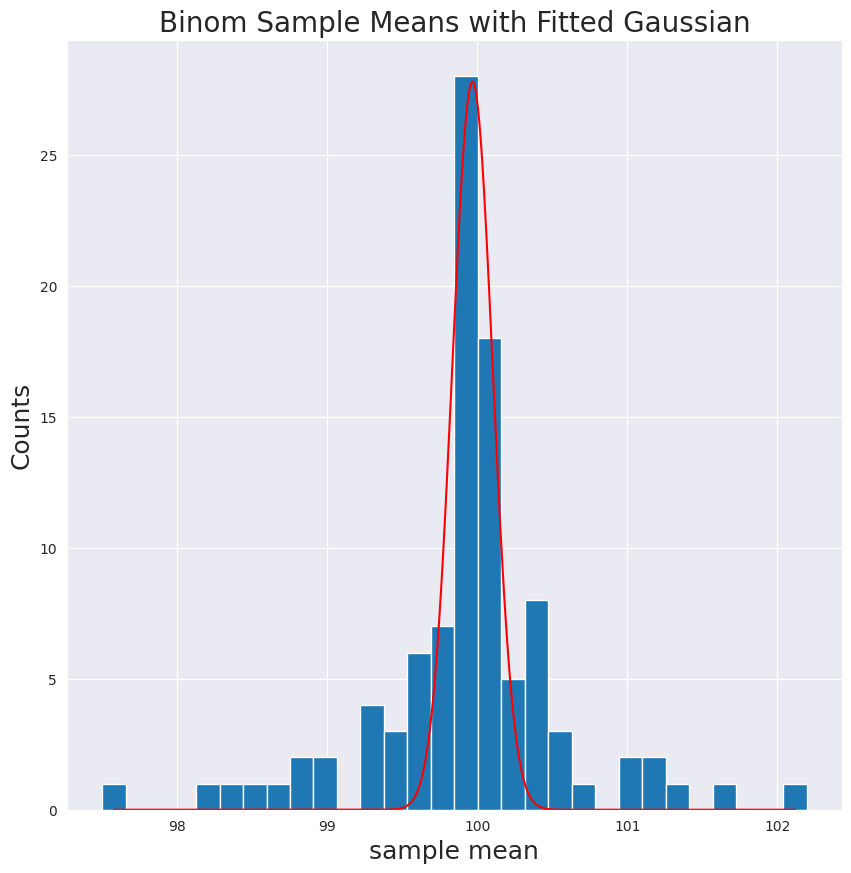

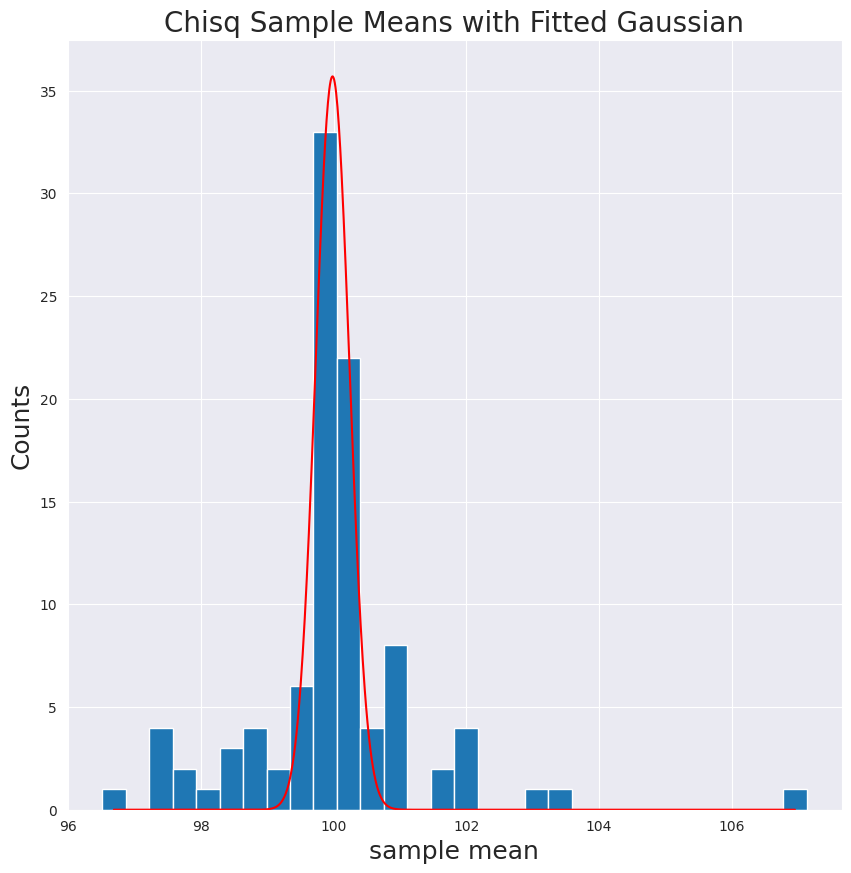

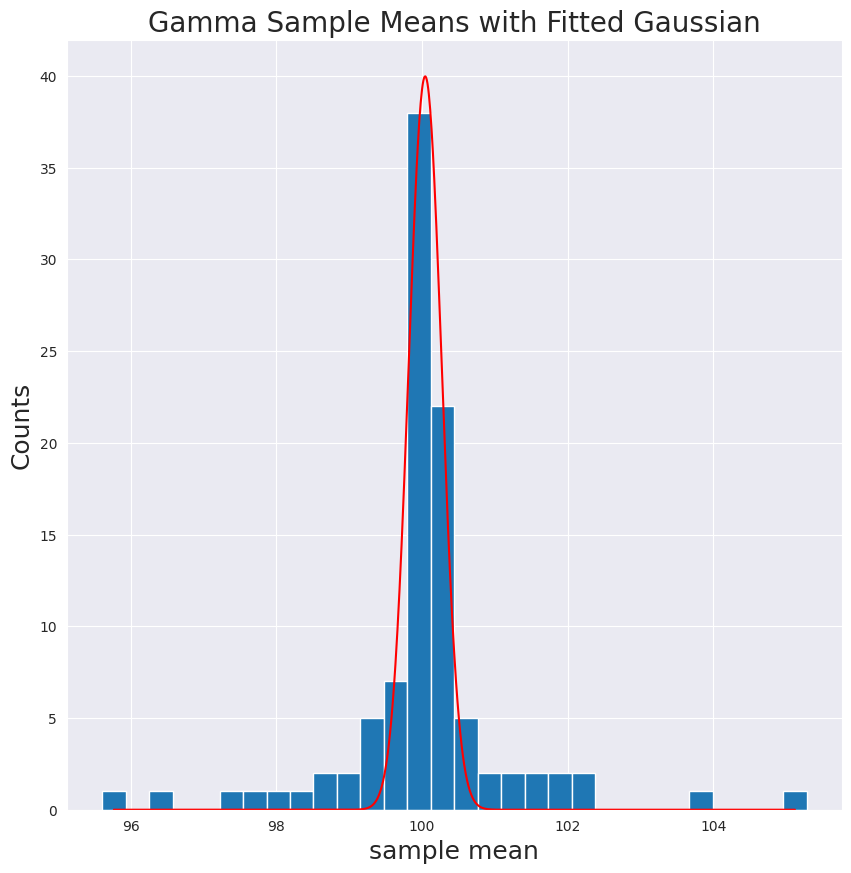

In [56]:
distributions = ['normal', 'pois', 'binom', 'chisq', 'gamma']

for dist in distributions:
    allmeans = list(mydists[dist]['means'].values())

    # Get histogram data
    counts, bin_edges = np.histogram(allmeans, bins=30)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Initial guess for the parameters: mu, sigma, amplitude
    initial_guess = [np.mean(allmeans), np.std(allmeans), max(counts)]
    result = minimize(fun, initial_guess, args=(bin_centers, counts))

    # Extracting best fit parameters
    best_mu, best_sigma, best_amplitude = result.x

    # Plotting
    pl.figure(figsize=(10, 10))
    pl.hist(allmeans, bins=30)

    x_fit = np.linspace(min(bin_centers), max(bin_centers), 1000)
    y_fit = gaussian(x_fit, best_mu, best_sigma, best_amplitude)
    pl.plot(x_fit, y_fit, '-r')
    pl.xlabel('sample mean', fontsize=18)
    pl.ylabel('Counts', fontsize=18)
    pl.title(f'{dist.capitalize()} Sample Means with Fitted Gaussian', fontsize=20)
    pl.show()
